Akurasi model: 95.32%


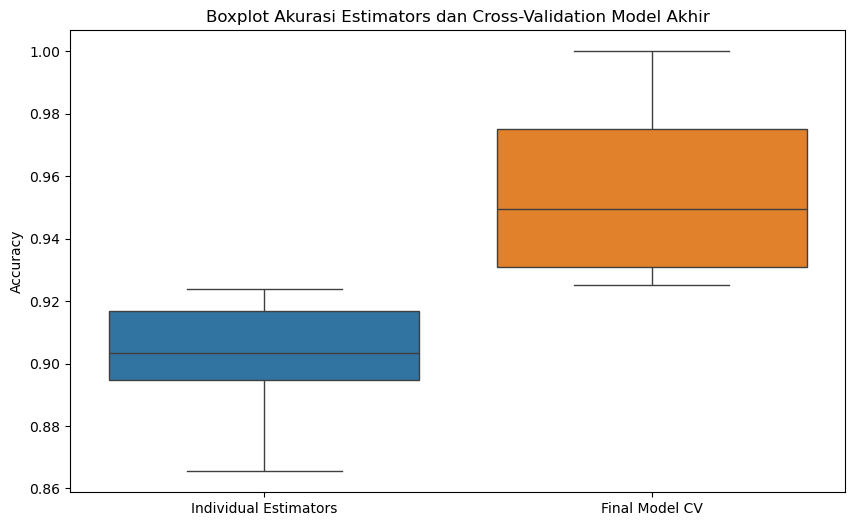

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns

# Memuat dataset kanker payudara
def load_breast_cancer_dataset():
    data = load_breast_cancer()
    X = data.data
    y = data.target
    return X, y

# Memuat dataset
X, y = load_breast_cancer_dataset()

# Memisahkan dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Membuat model BaggingClassifier dengan DecisionTree sebagai estimator dan 10 estimators
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=1)

# Melatih model pada data latih
bagging.fit(X_train, y_train)

# Memprediksi data uji
y_pred = bagging.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")

# Mengambil hasil akurasi dari masing-masing estimator
individual_accuracies = []
for estimator in bagging.estimators_:
    y_pred_individual = estimator.predict(X_test)
    individual_accuracy = accuracy_score(y_test, y_pred_individual)
    individual_accuracies.append(individual_accuracy)

# Melakukan cross-validation untuk model akhir (bagging)
cv_scores = cross_val_score(bagging, X_train, y_train, cv=10)

# Menggabungkan akurasi estimator dan cross-validation dalam satu boxplot
plt.figure(figsize=(10, 6))

# Gabungkan data ke dalam satu list untuk membuat boxplot
data = [individual_accuracies, cv_scores]
labels = ['Individual Estimators', 'Final Model CV']

# Membuat boxplot
sns.boxplot(data=data)
plt.title("Boxplot Akurasi Estimators dan Cross-Validation Model Akhir")
plt.ylabel("Accuracy")
plt.xticks(ticks=[0, 1], labels=labels)

plt.show()
